# Mean-Shift: Single Object Tracking in Images

Object tracking is one of the most popular areas of video processing. The main purpose of
object tracking is to estimate the position of the object in images continuously and reliably
against dynamic scenes. This can be achieved by using the mean shift object tracking
algorithm. The mean shift algorithm is an efficient approach to tracking objects whose
appearance is defined by histograms. Thus, it can be used to track non-rigid objects by
discovering clusters in a smooth density of samples.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(240, 320, 3)


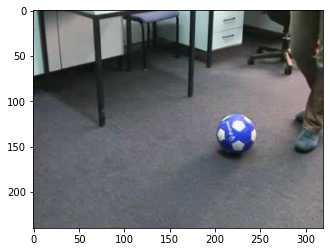

In [5]:
video = cv2.VideoCapture("./video.avi")

_,first_frame = video.read()
# cv2.imshow("First_Frame",first_frame)
# cv2.waitKey(0)

plt.imshow(first_frame)
print(first_frame.shape)

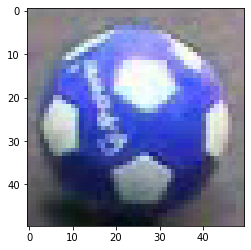

In [6]:
x = 200
y = 110
width = 50
height = 50
roi = first_frame[y:y+height, x:x+width]
plt.imshow(roi,)
# cv2.imshow('ROI',roi)
# cv2.waitKey(0)

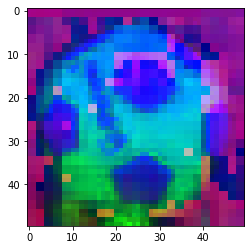

In [14]:
# HSV is Hue(Light Intensity) Saturation Value
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Caclulating Histogram of [ROI], num of channels, 
roi_hist = cv2.calcHist([hsv_roi],[0],None, [360], [0,360])
roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Termination Criteria = 
term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)
plt.imshow(hsv_roi)

(array([328.,  16.,   6.,   2.,   1.,   3.,   0.,   1.,   1.,   2.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ], dtype=float32),
 <BarContainer object of 10 artists>)

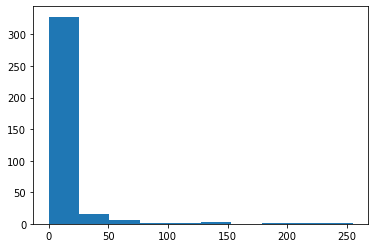

In [18]:
plt.hist(roi_hist)

In [31]:
video = cv2.VideoCapture("./video.avi")
while video.isOpened():
        ret, frame = video.read()
        if ret == True:
            hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
            mask = cv2.calcBackProject([hsv], [0], roi_hist, [0,360], 1)

            ret, track_window = cv2.meanShift(mask, (x,y,width,height), term_criteria)
            x,y,w,h = track_window
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)

            cv2.imshow("Mask", mask)
            cv2.imshow("Frame",frame)

            key = cv2.waitKey(30)
            if key == ord('q'):
                break
        else:
            break
video.release()
cv2.destroyAllWindows()